Project Title: Customer Churn Analysis

Project Overview:
In this project, you will work with a real-world dataset from a telecom company that includes
customer information, such as demographics, usage patterns, and whether they churned (i.e., left
the company) or not. The goal is to prepare the data for analysis, explore key patterns and trends,
and create visualizations to gain insights into factors influencing customer churn.

Project Objectives:
1. Clean and preprocess the raw dataset to make it suitable for analysis.
2. Explore the dataset to understand the distribution of key variables.
3. Identify factors that may be associated with customer churn.
4. Create informative visualizations to communicate findings effectively.

Project Tasks:
1. Load the raw dataset (e.g., CSV format) into a data analysis environment (Python with
Pandas).

In [2]:
import pandas as pd

csv_file_path = ('telecom_dataset.csv')

telecom_df = pd.read_csv('telecom_dataset.csv')

telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2. Examine the data for missing values, duplicates, and outliers.

In [3]:
# Check for missing values
missing_values = telecom_df.isnull().sum()

print('Missing Values')
print(missing_values)

Missing Values
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
# Check for duplicate rows

duplicates = telecom_df.duplicated()

num_duplicates = duplicates.sum()

print('Duplicate Rows', num_duplicates)

Duplicate Rows 0


3. Handle missing data through techniques like imputation (e.g., mean, median) or removal of
rows/columns.

In [6]:
# Impute Missing Data

# Impute missing values in a numerical column with the mean
telecom_df['SeniorCitizen'].fillna(telecom_df['SeniorCitizen'].mean(), inplace=True)

telecom_df['tenure'].fillna(telecom_df['tenure'].mean(), inplace=True)

telecom_df['MonthlyCharges'].fillna(telecom_df['MonthlyCharges'].mean(), inplace=True)

# print (telecom_df)




In [21]:
# Impute missing values in a categorical column with the mode
telecom_df['SeniorCitizen'].fillna(telecom_df['SeniorCitizen'].mode()[0], inplace=True)

telecom_df['tenure'].fillna(telecom_df['tenure'].mode()[0], inplace=True)

telecom_df['MonthlyCharges'].fillna(telecom_df['MonthlyCharges'].mode()[0], inplace=True)

# print (telecom_df)



      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [8]:
# Remove Rows with Missing Data

# Remove rows with any missing values
telecom_df.dropna(axis=0, inplace=True)

# print(telecom_df)

# Check for missing values after handling
missing_values = telecom_df.isnull().sum()
print('Missing Values after Handling')
print(missing_values)

Missing Values after Handling
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


4. Address duplicates, if any, and remove unnecessary columns.

In [24]:
# Check for duplicate rows
duplicates = telecom_df.duplicated()

num_duplicates = duplicates.sum()

print('Duplicate Rows', num_duplicates)

if num_duplicates > 0:
        telecom_df.drop_duplicates(inplace=True)

Duplicate Rows 0


In [10]:
duplicates_after_cleaning = telecom_df.duplicated()
num_duplicates_after_cleaning = duplicates_after_cleaning.sum()
print('Duplicate Rows after Cleaning', num_duplicates_after_cleaning)

# updated column list
print('Columns after Cleaning')
print(telecom_df.columns)

Duplicate Rows after Cleaning 0
Columns after Cleaning
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


5. Encode categorical variables (e.g., one-hot encoding) for modeling purposes.

In [11]:
# Identify categorical columns

categorical_columns = ['customerID', 'gender', 'Partner', 'Dependents', 'MultipleLines', 
                       'InternetService', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

# Apply one-hot encoding to each categorical column
telecom_df_encoded = pd.get_dummies(telecom_df, columns=categorical_columns, drop_first=True)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
telecom_df_final = pd.concat([telecom_df, telecom_df_encoded], axis=1)

# print(telecom_df_encoded)

telecom_df_encoded.head()

,SeniorCitizen,tenure,PhoneService,OnlineSecurity,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,No,No,29.85,29.85,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,Yes,Yes,56.95,1889.5,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,Yes,Yes,53.85,108.15,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,No,Yes,42.30,1840.75,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,Yes,No,70.70,151.65,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


6. Normalize or scale numeric features if needed.

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Specify the numeric columns you want to scale 
numeric_columns = ['tenure', 'MonthlyCharges']

# Apply Min-Max scaling to the selected columns
telecom_df[numeric_columns] = scaler.fit_transform(telecom_df[numeric_columns])

# Check summary statistics of scaled numeric columns
print(telecom_df[numeric_columns].describe())

            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean      0.449599        0.462803
std       0.341104        0.299403
min       0.000000        0.000000
25%       0.125000        0.171642
50%       0.402778        0.518408
75%       0.763889        0.712438
max       1.000000        1.000000


7. Perform descriptive statistics to summarize the dataset (e.g., mean, median, standard
deviation).

In [13]:
numerical_summary = telecom_df.describe()

print('Summary Statistics')
print(numerical_summary)

Summary Statistics
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147     0.449599        0.462803
std         0.368612     0.341104        0.299403
min         0.000000     0.000000        0.000000
25%         0.000000     0.125000        0.171642
50%         0.000000     0.402778        0.518408
75%         0.000000     0.763889        0.712438
max         1.000000     1.000000        1.000000


8. Explore the distribution of key variables, such as customer demographics (age, gender), usage
patterns (monthly charges, total charges), and churn status.

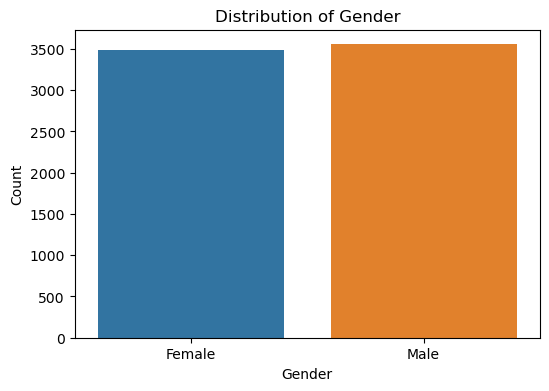

In [14]:
#  Customer Demographics

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Gender (assuming 'gender' is a categorical column)
plt.figure(figsize=(6, 4))
sns.countplot(data=telecom_df, x='gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

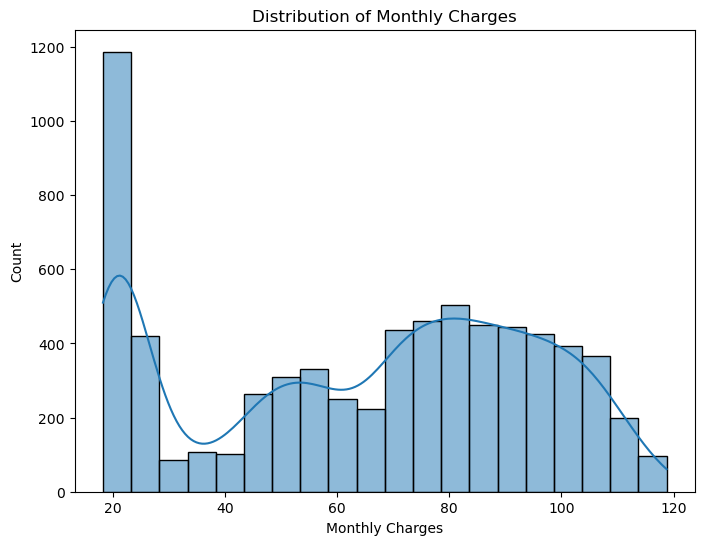

In [1]:
# Usage Patterns
import pandas as pd

csv_file_path = ('telecom_dataset.csv')
telecom_df = pd.read_csv('telecom_dataset.csv')

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(telecom_df['MonthlyCharges'], bins=20, kde=True)
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Distribution of Monthly Charges')
plt.show()

# plt.figure(figsize=(8, 10))
# sns.histplot(telecom_df['TotalCharges'], bins=20, kde=True)
# plt.xlabel('Total Charges')
# plt.ylabel('Count')
# plt.title('Distribution of Monthly Total Charges')
# plt.show()



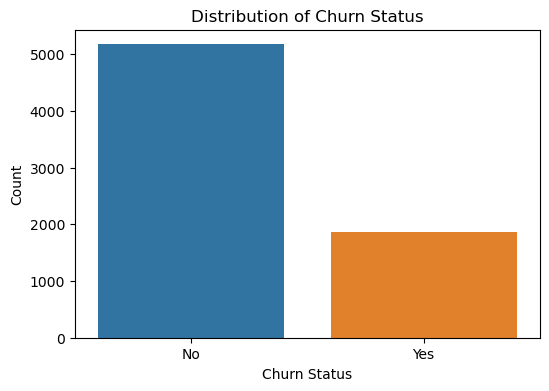

In [1]:
#  Churn Status
import pandas as pd
csv_file_path = ('telecom_dataset.csv')
telecom_df = pd.read_csv('telecom_dataset.csv')

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Churn Status (assuming 'churn' is a categorical column)
plt.figure(figsize=(6, 4))
sns.countplot(data=telecom_df, x='Churn')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Distribution of Churn Status')
plt.show()

9. Calculate and visualize correlations between variables (e.g., using a heatmap)

C:\Users\hp\AppData\Local\Temp\ipykernel_652\1120346305.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = telecom_df.corr()


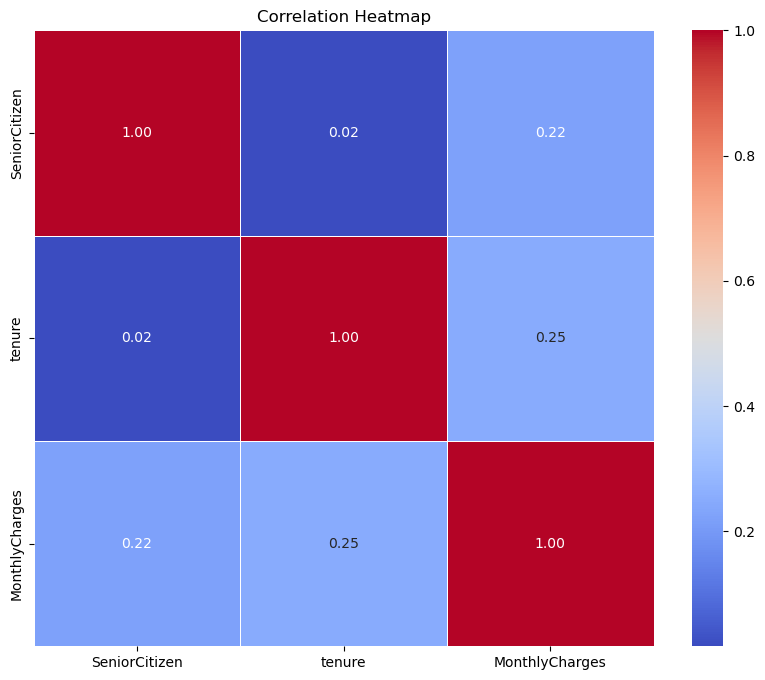

In [9]:
# Calculate the correlation matrix
correlation_matrix = telecom_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Interpretation: In the heatmap, darker colors represent stronger correlations. Positive values indicate a positive correlation (as one variable increases, the other tends to increase), while negative values indicate a negative correlation (as one variable increases, the other tends to decrease). Values close to zero suggest a weak or no linear relationship.

10. Conduct hypothesis tests (e.g., t-tests) to compare differences between churned and
non-churned customers.

In [20]:
import pandas as pd
import scipy.stats as stats

churned_customers = telecom_df[telecom_df['Churn'] == 'Yes']
non_churned_customers = telecom_df[telecom_df['Churn'] == 'No']

variable_to_test = ('MonthlyCharges')

t_stat, p_value = stats.ttest_ind(churned_customers[variable_to_test], 
                                  non_churned_customers[variable_to_test],
                                    equal_var=False)
print (t_stat, p_value)

variable_to_test = ('tenure')

t_stat, p_value = stats.ttest_ind(churned_customers[variable_to_test], 
                                  non_churned_customers[variable_to_test],
                                    equal_var=False)
print (t_stat, p_value)


18.407526676414673 8.59244933154705e-73
-34.823818696312976 1.1954945472607151e-232


11. Create summary tables and statistics for various customer segments (e.g., by contract type,
payment method).

In [38]:
# Group Data by contract 
contract_customers = telecom_df.groupby('Contract')


# Calculate mean monthly charges by contract type
mean_monthly_charges_by_contract = contract_customers['MonthlyCharges'].mean()

# Create a summary table for mean monthly charges by contract type
contract_mean_charges_summary = pd.DataFrame(mean_monthly_charges_by_contract).reset_index()
contract_mean_charges_summary.columns = ['Contract', 'MeanMonthlyCharges']

print(contract_mean_charges_summary)







         Contract  MeanMonthlyCharges
0  Month-to-month           66.398490
1        One year           65.048608
2        Two year           60.770413


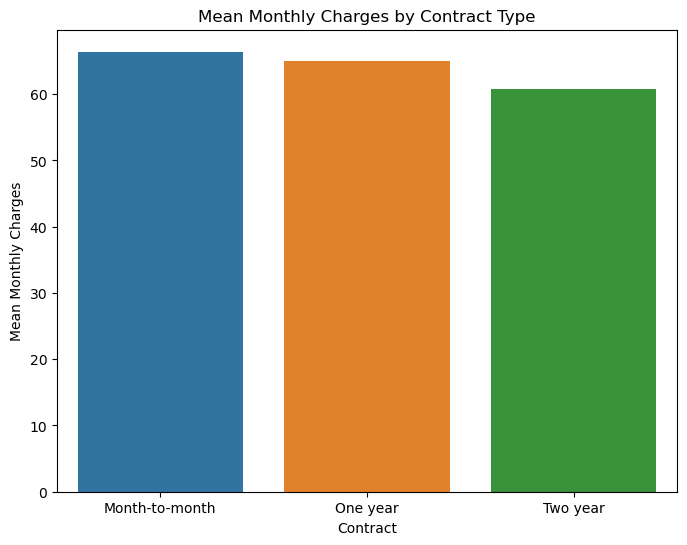

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for mean monthly charges by contract type
plt.figure(figsize=(8, 6))
sns.barplot(data=contract_mean_charges_summary, x='Contract', y='MeanMonthlyCharges')
plt.xlabel('Contract')
plt.ylabel('Mean Monthly Charges')
plt.title('Mean Monthly Charges by Contract Type')
plt.show()


         Contract  MeanMonthlyCharges
0  Month-to-month           66.398490
1        One year           65.048608
2        Two year           60.770413


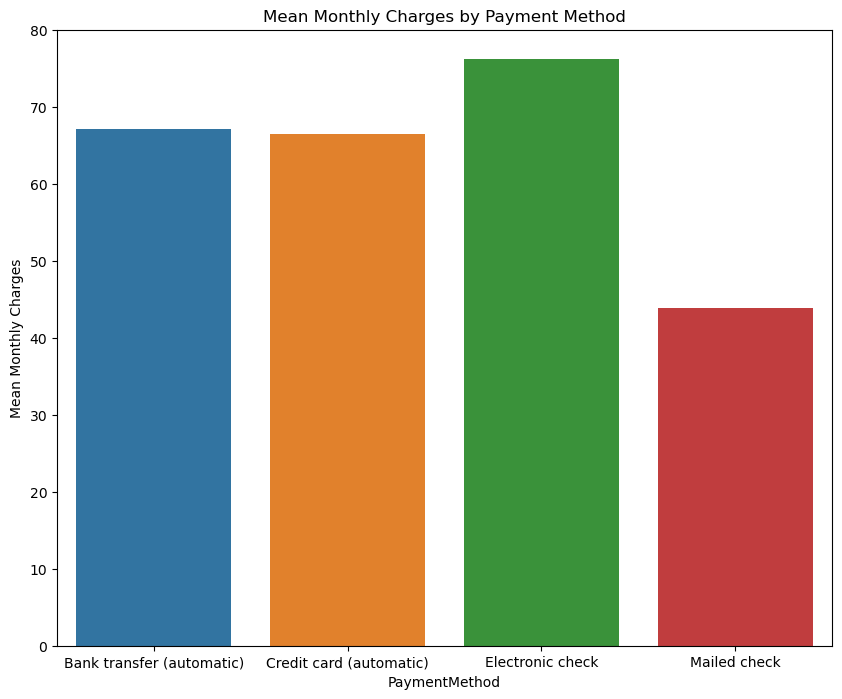

In [52]:
# Group Data by paymentmethod 
paymentmethod_customers = telecom_df.groupby('PaymentMethod')


# Calculate mean monthly charges by paymentmethod type
mean_monthly_charges_by_paymentmethod = paymentmethod_customers['MonthlyCharges'].mean()

# Create a summary table for mean monthly charges by paymentmethod
paymentmethod_mean_charges_summary = pd.DataFrame(mean_monthly_charges_by_paymentmethod).reset_index()
paymentmethod_mean_charges_summary.columns = ['PaymentMethod', 'MeanMonthlyCharges']

print(contract_mean_charges_summary)



# Bar chart for mean monthly charges by contract type
plt.figure(figsize=(10, 8))
sns.barplot(data=paymentmethod_mean_charges_summary, x='PaymentMethod', y='MeanMonthlyCharges')
plt.xlabel('PaymentMethod')
plt.ylabel('Mean Monthly Charges')
plt.title('Mean Monthly Charges by Payment Method')
plt.show()

12. Generate insightful visualizations to communicate findings, including:
- Bar plots and histograms to show distribution of categorical and numeric variables.
- Box plots to identify outliers.
- Scatter plots to explore relationships between numeric variables.
- Pie charts to visualize the proportion of churned vs. non-churned customers.
- Time series plots (if applicable) to observe trends over time.
13. Use Seaborn, Matplotlib, or other visualization libraries to enhance the aesthetics and clarity
of plots.
14. Provide captions and labels for each visualization to make them self-explanatory.

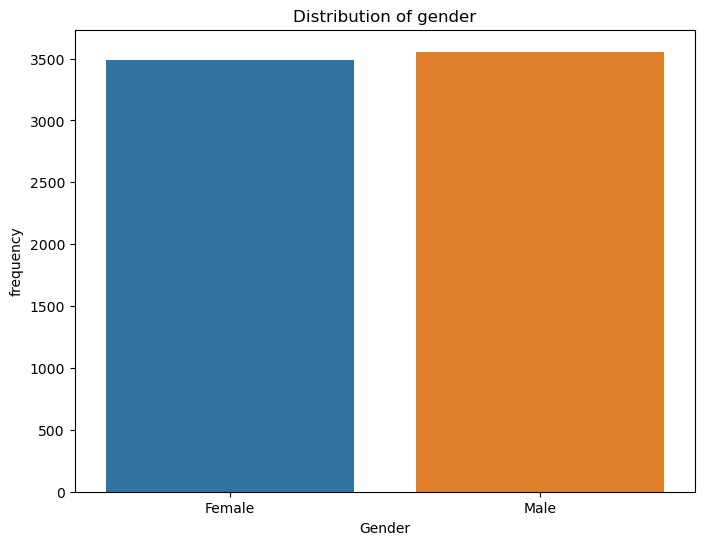

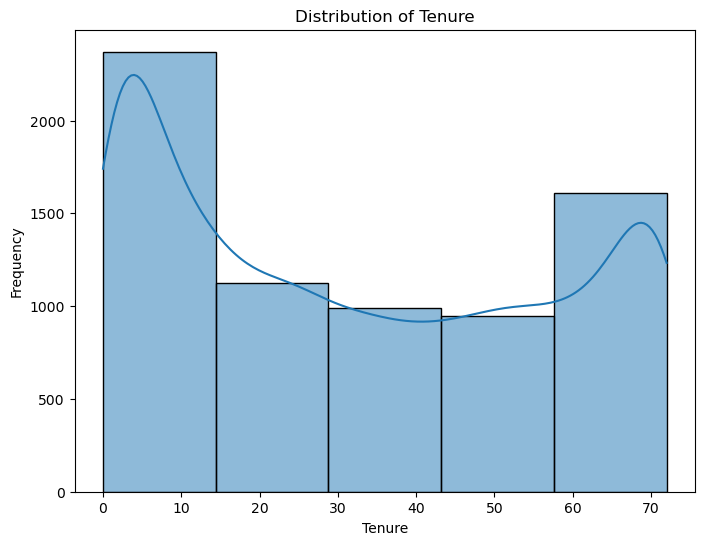

In [4]:
import pandas as pd

csv_file_path = ('telecom_dataset.csv')

telecom_df = pd.read_csv('telecom_dataset.csv')

import seaborn as sns
import matplotlib.pyplot as plt
#  distribution of the categorical variable "Gender" using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=telecom_df, x='gender')
plt.title('Distribution of gender')
plt.xlabel('Gender')
plt.ylabel('frequency')
plt.show()

# Pdistribution of the numeric variable "Tenure" using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=telecom_df, x='tenure', bins=5, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

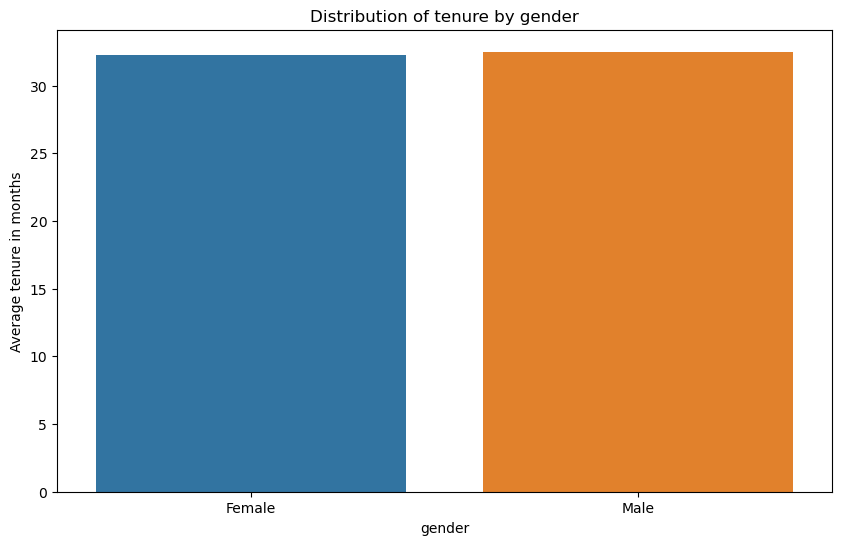

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# grouped bar chart of distribution of tenure by gender
plt.figure(figsize=(10, 6))
sns.barplot(data=telecom_df, x='gender', y='tenure', errorbar=None)
plt.title('Distribution of tenure by gender')
plt.xlabel('gender')
plt.ylabel('Average tenure in months')
plt.show()

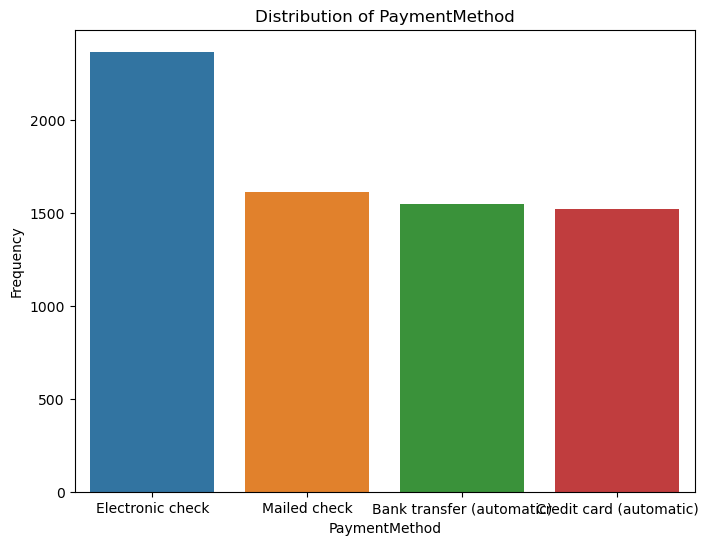

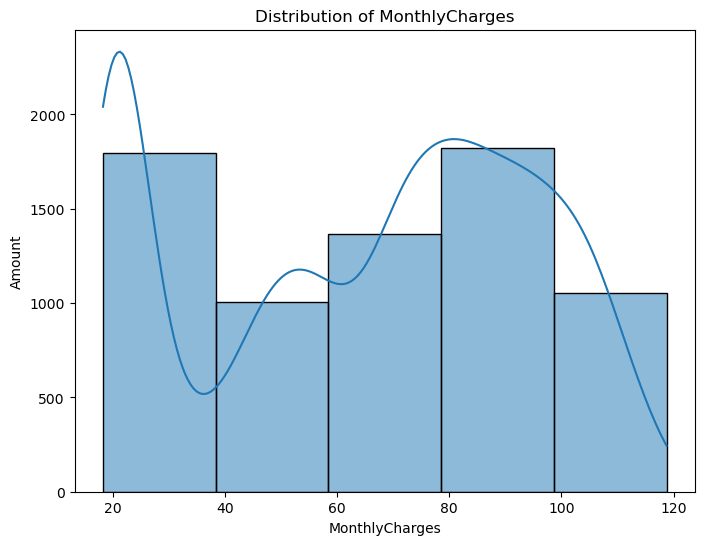

In [5]:
import pandas as pd

csv_file_path = ('telecom_dataset.csv')

telecom_df = pd.read_csv('telecom_dataset.csv')

import seaborn as sns
import matplotlib.pyplot as plt
# Plot the distribution of the categorical variable "Paymenmethod" using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=telecom_df, x='PaymentMethod')
plt.title('Distribution of PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of the numeric variable "MonthlyCharges" using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data= telecom_df, x='MonthlyCharges', bins=5, kde=True)
plt.title('Distribution of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Amount')
plt.show()

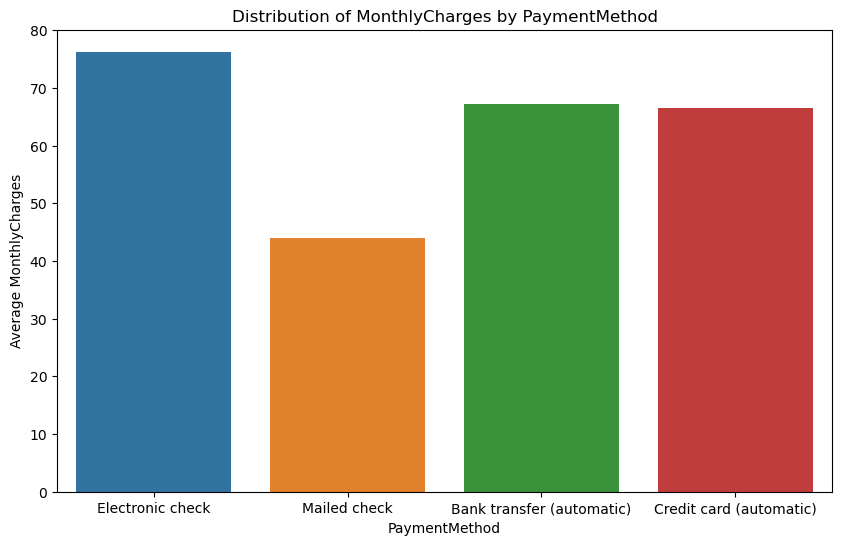

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# grouped bar chart of distribution of monthlycharges by paymentmethod
plt.figure(figsize=(10, 6))
sns.barplot(data=telecom_df, x='PaymentMethod', y='MonthlyCharges', errorbar=None)
plt.title('Distribution of MonthlyCharges by PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Average MonthlyCharges')
plt.show()

- Box plots to identify outliers.

Summary Statistics
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


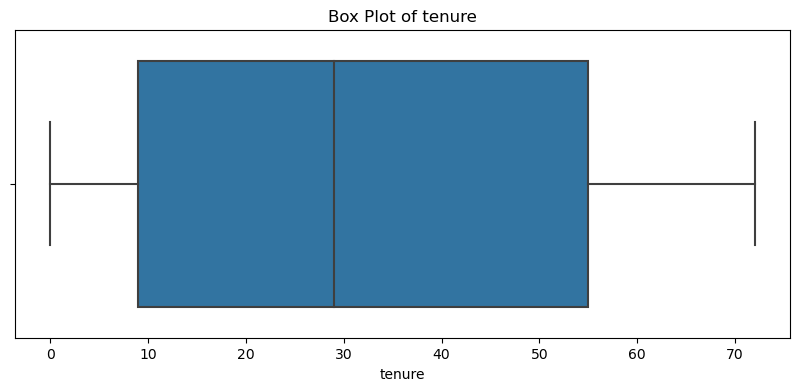

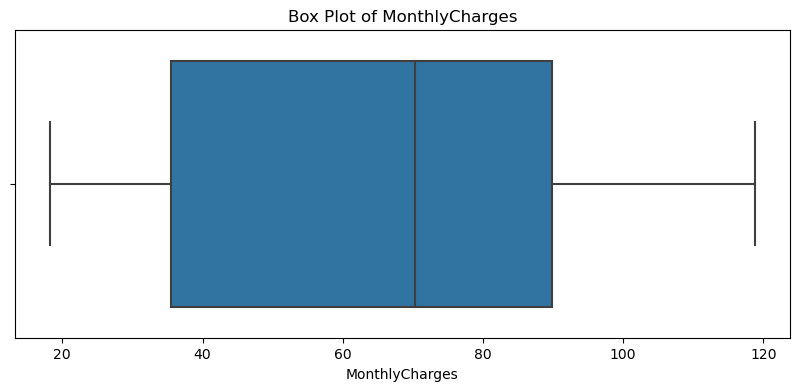

In [11]:

# Check for outliers

numerical_summary = telecom_df.describe()

print('Summary Statistics')
print(numerical_summary)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.boxplot(data=telecom_df, x='tenure')
plt.title('Box Plot of tenure')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=telecom_df, x='MonthlyCharges')
plt.title('Box Plot of MonthlyCharges')
plt.show()


- Scatter plots to explore relationships between numeric variables.

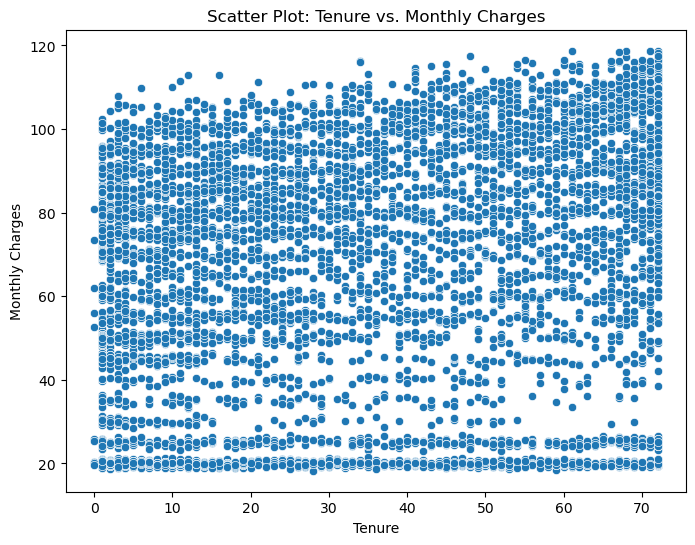

In [17]:
#Scatter plot for monthly charges vs. total charges

plt.figure(figsize=(8, 6))
sns.scatterplot(data=telecom_df, x='tenure', y='MonthlyCharges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Scatter Plot: Tenure vs. Monthly Charges')
plt.show()


Pie charts to visualize the proportion of churned vs. non-churned customers.

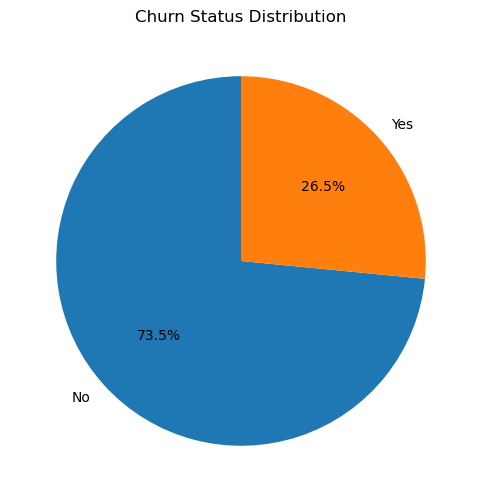

In [18]:
# Pie chart for churn status
churn_counts = telecom_df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Status Distribution')
plt.show()


15. Summarize key insights and findings from the visualizations.

1. Distribution of Categorical Variables:

- The majority of customers have a "Month-to-Month" contract type, followed by "Two-Year" and "One-Year" contracts, according to the mean month monthly charges.
- Payment method "Electronic Check" is the most common, while "Credit Card (Automatic)" are less frequently used paymentmethod.
- "Electronic Check"shows highest mean monthly charges compare to "Mail Chec" and others.


2. Distribution of Numeric Variables:

- "Gender" shows a relatively uniform distribution across customers.
- Monthlycharges tend to vary, with a peak around $40-$60 per monthly(weekly) tenure.
- Total charges exhibit right-skewness, with many customers having lower total charges.

3. Box Plots for Numeric Variables:

- "Monthly charges" have some outliers on the higher end, suggesting that some customers pay significantly more.
- The "Tenure" also have outliers, indicating that a few customers have exceptionally low tenure period.

4. Scatter Plots:

- There is a positive correlation between monthly charges and total charges, suggesting that customers who pay more on a monthly basis also tend to have higher total charges.

5. Churn Status:

- The churn status distribution reveals that a significant proportion (26.5%) of customers have churned, while other 73.5% have not. This indicates a potential issue with customer retention.


Key Findings and Insights:

- The distribution of contract types and payment methods provides insights into customer preferences and potential areas for marketing and service improvement.
- The presence of outliers in monthly and total charges suggests that some customers may have unique billing patterns or usage behaviors.
- The positive correlation between monthly and total charges indicates that customers who pay more monthly tend to have higher total charges, which is expected.
- The churn status distribution highlights the challenge of customer retention, dissatisfaction with the product, competitive offers from other companies, or changes in customer circumstances, indicating the need to identify factors contributing to churn and develop strategies to reduce it.